# Quick Analysis 

Notebook to perform quick analysis and visualization to debug the simulation.

In [64]:
%matplotlib inline

import os
import sys 
import json
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from operator import itemgetter

# Modify the Notebook path
sys.path.append(os.path.join(os.getcwd(), ".."))

In [48]:
with open('../ConsistencySimulation-20160127.json', 'r') as f:
    results = json.load(f)

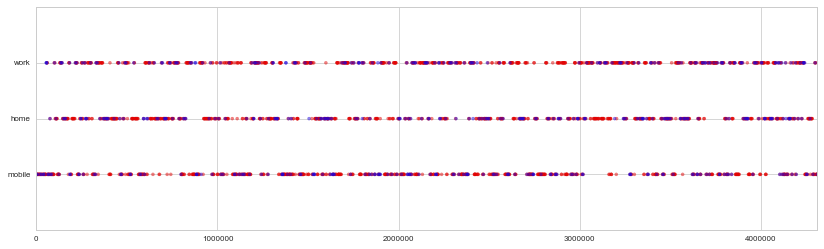

In [83]:
locations = defaultdict(list)

# Build the data from both the read and write time series
for key in ('read', 'write'):
    for item in results['results'][key]:
        
        series_idx = 1 # 1 for location, 2 for device:
        locations[item[series_idx]].append(
            item + [key]
        )

# Sort the data by timestamp
for key in locations:
    data.sort(key=itemgetter(0))

# Create the visualization
x = []
y = [] 
c = []

for idx, (key, lst) in enumerate(locations.items()):
    for item in lst:
        x.append(item[0])
        y.append(idx)
        color = '#E20404' if item[-1] == 'read' else '#1E05D9'
        
        c.append(color)

plt.figure(figsize=(14,4))
plt.ylim((-1,len(locations)))
plt.xlim((-1000, max(item[-1][0] for item in locations.values())+1000))
plt.yticks(range(len(locations)), locations.keys())
plt.scatter(x, y, color=c, alpha=0.5, s=10)
plt.savefig('workload.svg', format='svg', dpi=1200)